# Health Insurance Premium Prediction Using Supervised Machine Learning

## Importing The Required Libaries

In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

# for pre-processing
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

# for model selection and prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# evaluation
from sklearn.model_selection import cross_val_score

# hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


## Loading the Insurance Dataset

In [3]:
import pandas as pd
#reading the insurance dataset
insurance_data = pd.read_csv("insurance.csv") 
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

## Checking for Missing and Null values

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data PreProcessing

## One Hot Encoding 

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.get_dummies(insurance_data,columns = ['region','sex','smoker'])

encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   region_northeast  1338 non-null   uint8  
 5   region_northwest  1338 non-null   uint8  
 6   region_southeast  1338 non-null   uint8  
 7   region_southwest  1338 non-null   uint8  
 8   sex_female        1338 non-null   uint8  
 9   sex_male          1338 non-null   uint8  
 10  smoker_no         1338 non-null   uint8  
 11  smoker_yes        1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


## Looking For Correlations

In [7]:
# Pearson co-relation 
# Kendall and spearman
corr_matrix = encoded_data.corr()
corr_matrix['charges'].sort_values(ascending = False)

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
Name: charges, dtype: float64

## Scatter Plot

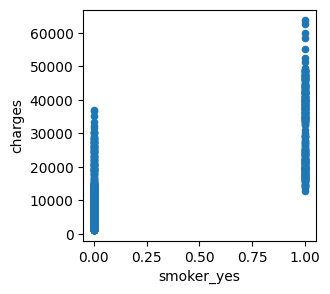

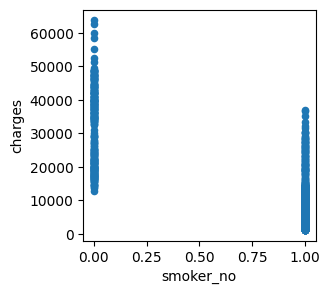

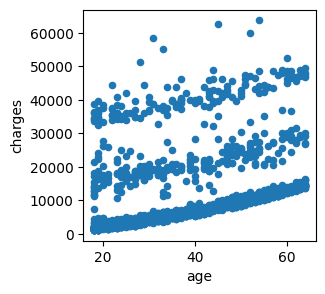

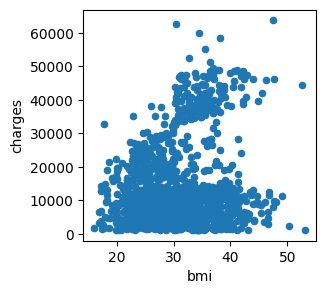

In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
def scatter_plot(x_value,y_value):
    encoded_data.plot(kind = "scatter",x = x_value, y = y_value,figsize = (3,3))

scatter_plot("smoker_yes","charges")
scatter_plot("smoker_no","charges")
scatter_plot("age","charges")
scatter_plot("bmi","charges")

## Spliting Of Dataset Into Train And Test Dataset

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(encoded_data,test_size = 0.2, random_state = 42)

## Function To Separate Independent and Dependent Variables

In [10]:
def separating_variables(dataset):
    features = dataset.drop('charges',axis = 1)
    label = dataset['charges'].copy()
    return features,label

## Function To Scale the Dataset

In [11]:
from sklearn.preprocessing import StandardScaler
def scale_data(dataset):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset)
    return scaled_data

## Separating Dependent And Independent Variables in the Train and Test Dataset

In [12]:
train_features, train_label = separating_variables(train_set)

test_features, test_label = separating_variables(test_set)

## Scaling The Train Dataset

In [13]:
scaled_train_set = scale_data(train_features)

scaled_test_set = scale_data(test_features) 

# Evaluation

## Funtion for Evaluation Parameters

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score

def print_output(scoring,model,parameter,fold):
    print("The {} score for the {} is {} for {} fold cross validation\n".format(scoring,model,round(parameter,3),fold))

import math 
def EvalPar(model,fold):
    np.random.seed(42)
    #mean sqaured error
    mse = cross_val_score(model,scaled_test_set,test_label,cv = fold,scoring = 'neg_mean_squared_error')
    rmse = np.array([math.sqrt(abs(i)) for i in mse])
      
    print_output("root mean squared error",model,rmse.mean(),fold)      

# Multiple Linear Regression

## Applying the Multiple Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression()

LinearReg.fit(scaled_train_set, train_label)

LinearRegression()

## Predicting the Charges

In [16]:
Linearpred = LinearReg.predict(scaled_test_set)

## Evaluating for Multiple Linear Regression

In [17]:
EvalPar(LinearReg,5)

The root mean squared error score for the LinearRegression() is 5989.549 for 5 fold cross validation



In [18]:
EvalPar(LinearReg,10)

The root mean squared error score for the LinearRegression() is 5956.769 for 10 fold cross validation



# KNN Regression

## Applying KNN Regression

In [19]:
from sklearn import neighbors
KNNReg = neighbors.KNeighborsRegressor(n_neighbors = 5)
KNNReg.fit(scaled_train_set, train_label)

KNeighborsRegressor()

## Predicting the charges

In [20]:
KNNReg.predict(scaled_test_set);

## Evaluating for KNN Regression

In [21]:
EvalPar(KNNReg,5)

The root mean squared error score for the KNeighborsRegressor() is 6269.507 for 5 fold cross validation



In [22]:
EvalPar(KNNReg,10)

The root mean squared error score for the KNeighborsRegressor() is 6104.724 for 10 fold cross validation



# Decision Tree Regression

## Applying Decision Tree regression

In [24]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()
DTReg.fit(scaled_train_set, train_label)

DecisionTreeRegressor()

## Predicting the charges

In [25]:
DTpred = DTReg.predict(scaled_test_set);

## Evaluating for Decision Tree Regression

In [26]:
EvalPar(DTReg,5)

The root mean squared error score for the DecisionTreeRegressor() is 6221.689 for 5 fold cross validation



In [27]:
EvalPar(DTReg,10)

The root mean squared error score for the DecisionTreeRegressor() is 6244.383 for 10 fold cross validation



## Hyperparameter tuning for Decision Tree Regression

### RandomSearchCV Method 

In [28]:
#get parameters
DTReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

DTgrid = {"min_impurity_decrease":[0.0,1.1,2.5,3.5],
          "max_depth":[None,5,3,2],
          "max_features":['auto','sqrt','log2'],
          "min_samples_split":[2,3,5],
          "min_samples_leaf":[1,2,4]}
RCV_DTReg = RandomizedSearchCV(estimator = DTReg,
                              param_distributions = DTgrid,
                              n_iter = 10,
                              cv = 5,
                              verbose = 2)
RCV_DTReg.fit(scaled_train_set,train_label)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=3.5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=3.5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=3.5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=3.5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=3.5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=3.5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=3.5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, mi

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [None, 5, 3, 2],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': [0.0, 1.1, 2.5,
                                                                  3.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5]},
                   verbose=2)

In [30]:
RCV_DTReg.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 3.5,
 'max_features': 'auto',
 'max_depth': 2}

### Baseline Decision Tree Regressor Model Score

In [31]:
DTReg.score(scaled_test_set,test_label)

0.7840853610574918

### Model Score after tuning hyperparameters with RandomSearchCV Method

In [32]:
RCV_DTReg.score(scaled_test_set,test_label)

0.8392745587642383

### GridSearchCV Method

In [33]:
from sklearn.model_selection import GridSearchCV
DTgrid = {"min_impurity_decrease":[0.0,2.1,1.1],
          "max_depth":[3,2,4,5],
          "max_features":['auto','sqrt'],
          "min_samples_split":[2,4,5],
          "min_samples_leaf":[2,4]}
GCV_DTReg = GridSearchCV(estimator = DTReg,
                         param_grid = DTgrid,
                         cv = 5,
                         verbose = 2)
GCV_DTReg.fit(scaled_train_set,train_label)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, max_features=auto, 

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=2, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_spli

[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=auto, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_impurity_decrease=2.1, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_spli

[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1.1, min_samples_leaf=4, min_samples_spli

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 2, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_impurity_decrease': [0.0, 2.1, 1.1],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4, 5]},
             verbose=2)

In [34]:
GCV_DTReg.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

### Model Score after using GridSearchCV method

In [35]:
GCV_DTReg.score(scaled_test_set,test_label)

0.8682501578297672

# Random Forest Regression

## Applying Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor()
RFReg.fit(scaled_train_set,train_label)

RandomForestRegressor()

## Predicting the charges

In [37]:
RFReg.predict(scaled_test_set);

## Evaluating the random forest regression

In [38]:
EvalPar(RFReg,5)

The root mean squared error score for the RandomForestRegressor() is 4771.441 for 5 fold cross validation



In [39]:
EvalPar(RFReg,10)

The root mean squared error score for the RandomForestRegressor() is 4744.173 for 10 fold cross validation



## Hyperparameters Tuning

### Using RandomSearchCV

In [43]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
RFgrid = {"n_estimators": [10,100,150,200],
        "criterion":['squared_error', 'absolute_error', 'poisson'],
        "max_depth":[None,5,10,15,25],
        "max_features":['auto','sqrt','log2',None],
        "min_samples_split":[2,4,7,1],
        "min_samples_leaf":[1,2,3]}
RCV_RFReg = RandomizedSearchCV(estimator = RFReg,
                              param_distributions = RFgrid,
                              n_iter = 15,
                              cv = 5,
                              verbose = 2)
RCV_RFReg.fit(scaled_train_set,train_label)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END criterion=poisson, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END criterion=poisson, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.2s
[CV] END criterion=poisson, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.2s
[CV] END criterion=poisson, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END criterion=poisson, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=3, min_sample

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   1.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   1.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   1.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   1.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   1.2s
[CV] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   2.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   2.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   2.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   2.7s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   2.3s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200; total time=   0.7s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200; total time=   1.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.2s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.2s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   7.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   6.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   6.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   7.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END criterion=poisson, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=1, n_estimators=150; total time=   0.1s
[CV] END criterion=poisson, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=1, n_estimators=150; total time=   0.1s
[CV] END criterion=poisson, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV] END criterion=poisson, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=1, n_estimators=150; total time=   0.1s
[CV] END criterion=poisson, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=1, n_estimators=150; total time=   0.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   0.9s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   1.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   1.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   1.0s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   1.0s
[CV] END criterion=squared_error, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.2s
[CV] END criterion=squared_error, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.2s
[CV] END criterion=squared_error, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=25, max_features=None, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total ti

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 15, 25],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 7, 1],
                                        'n_estimators': [10, 100, 150, 200]},
                   verbose=2)

In [45]:
RCV_RFReg.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'absolute_error'}

### Baseline Random Forest Regressor Model Score

In [46]:
RFReg.score(scaled_test_set,test_label)

0.859868750040822

### Model Score after Hyperparameter Tuning by RandomSearchCV method

In [47]:
RCV_RFReg.score(scaled_test_set,test_label)

0.8786047789551993

## Using GridSearchCV

In [97]:
grid = {"n_estimators": [100,200],
        "criterion":['absolute_error','poisson'],
        "max_depth":[None,15],
        "max_features":['sqrt','auto'],
        "min_samples_split":[4],
        "min_samples_leaf":[2,3]}
GCV_RFReg = GridSearchCV(estimator = RFReg,
                         param_grid = grid,
                         cv = 5,
                         verbose = 2)
GCV_RFReg.fit(scaled_train_set,train_label);

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.0s
[CV] END criterion=absolute_error, max_depth=None,

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.7s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.7s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.9s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.9s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.9s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.8s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.8s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.6s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   2.4s
[CV] END criterion=poisson, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.3s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END criterion=poisso

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [107]:
GCV_RFReg.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

### Model Score after using GridSearchCV method

In [99]:
GCV_RFReg.score(scaled_test_set,test_label)

0.8835648798308859

# Support Vector Machine

## Applying the support vector machine

In [40]:
from sklearn.svm import SVR
SVRReg = SVR()
SVRReg.fit(scaled_train_set,train_label)

SVR()

## Predicting the charges

In [41]:
SVRReg.predict(scaled_test_set);

## Evaluating the Support vector machine

In [42]:
EvalPar(SVRReg,5)

The root mean squared error score for the SVR() is 13212.507 for 5 fold cross validation



In [44]:
EvalPar(SVRReg,10)

The root mean squared error score for the SVR() is 12958.936 for 10 fold cross validation

